In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

In [18]:
vgsales = pd.read_csv("/home/blair/cognixia/AdvancedPhase/Data_Analytics_Project/VGSales.csv")

In [19]:
gcs = pd.DataFrame ({
    'Genre': vgsales['Genre'],
    'North America': vgsales['NA_Sales'],
    'Europe': vgsales['EU_Sales'],
    'Japan': vgsales['JP_Sales']
})

gcs

,Genre,North America,Europe,Japan
0,Sports,41.36,28.96,3.77
1,Racing,15.68,12.76,3.79
2,Sports,15.61,10.93,3.28
3,Platform,11.28,9.14,6.50
4,Misc,13.96,9.18,2.93
...,...,...,...,...
6531,Action,0.00,0.01,0.00
6532,Fighting,0.01,0.00,0.00
6533,Action,0.00,0.01,0.00
6534,Shooter,0.01,0.00,0.00


In [20]:
'''
This kernal specifies the unique categories for genre 
within the Video Game Sales Database.
'''

genre = gcs['Genre'].unique()
genre

array(['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle',
       'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure',
       'Strategy'], dtype=object)

In [21]:
'''
This kernal groups the total sales of each country
by the genre and combines the results into
one dataframe.
'''
naSales = pd.DataFrame(gcs.groupby('Genre')['North America'].sum())
euSales = pd.DataFrame(gcs.groupby('Genre')['Europe'].sum())
jpSales = pd.DataFrame(gcs.groupby('Genre')['Japan'].sum())
genreSales = pd.concat([naSales, euSales, jpSales], axis=1)
# genreSales = pd.concat([naSales, euSales, jpSales], axis=0) # example of why the axis is important/necessary

genreSales

,North America,Europe,Japan
Genre,,,
Action,503.47,316.88,69.87
Adventure,35.46,21.29,8.54
Fighting,135.12,60.07,27.85
Misc,216.32,118.42,33.18
Platform,180.62,100.77,40.74
Puzzle,33.16,24.02,14.98
Racing,219.93,161.71,27.66
Role-Playing,177.89,80.13,118.62
Shooter,306.19,182.73,13.22


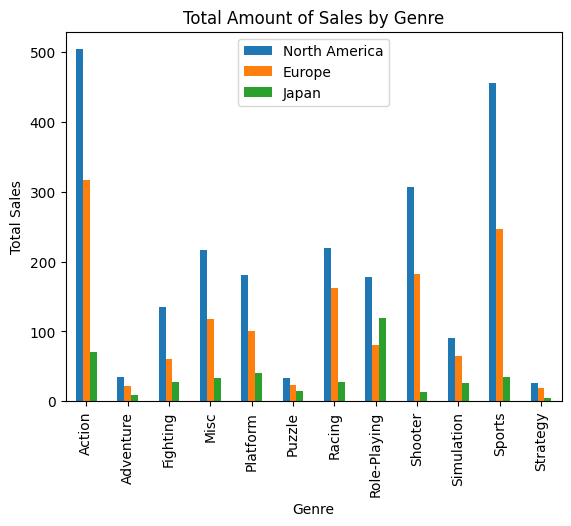

In [78]:
genreSales.plot(kind='bar')
plt.title('Total Amount of Sales by Genre')
plt.ylabel('Total Sales')
plt.show()

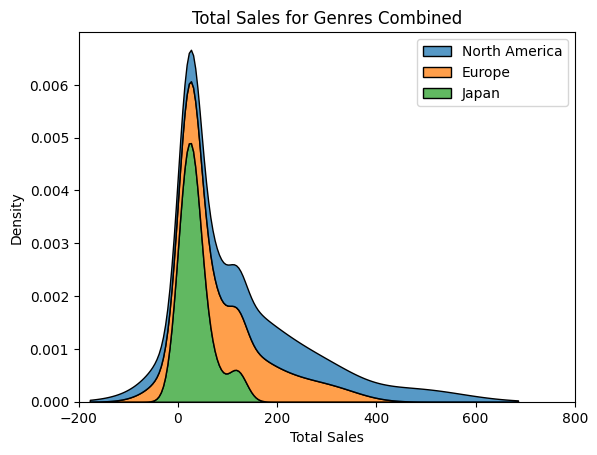

In [79]:
'''
This kernal exhibits the results of the
previous kernal in a KDE plot to display the 
sales of each country by genre.
'''
sns.kdeplot(genreSales, multiple='stack').set(title='Total Sales for Genres Combined', xlabel='Total Sales')
plt.xlim(-200, 800)

plt.show()

In [28]:
# SALES RANGE FOR EACH COUNTRY

'''
This kernal calculates the range of sales for each country.
'''

# genreSales.max()
# North America    503.47
# Europe           316.88
# Japan            118.62

# genreSales.min()
# North America    25.98
# Europe           19.62
# Japan             4.30

gcsRange = genreSales.max() - genreSales.min()
gcsRange

North America    477.49
Europe           297.26
Japan            114.32
dtype: float64

(array([0, 1, 2]),
 [Text(0, 0, 'North America'), Text(0, 1, 'Europe'), Text(0, 2, 'Japan')])

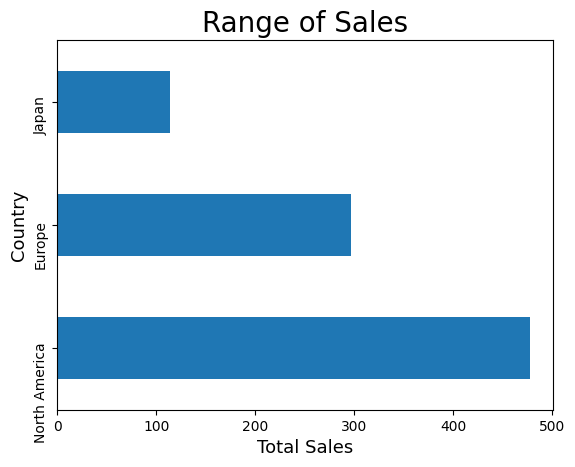

In [80]:
gcsRange.plot(kind='barh')
plt.title('Range of Sales', size=20)
plt.xlabel('Total Sales', size=13)
plt.ylabel('Country', size=13)
plt.yticks(rotation=90)

In [30]:
naV = statistics.variance(gcs['North America'])
eV = statistics.variance(gcs['Europe'])
jV = statistics.variance(gcs['Japan'])

gcsVariance = [naV, eV, jV]
gcsVariance

[0.8050487911434429, 0.4184643375867071, 0.08467205247331243]

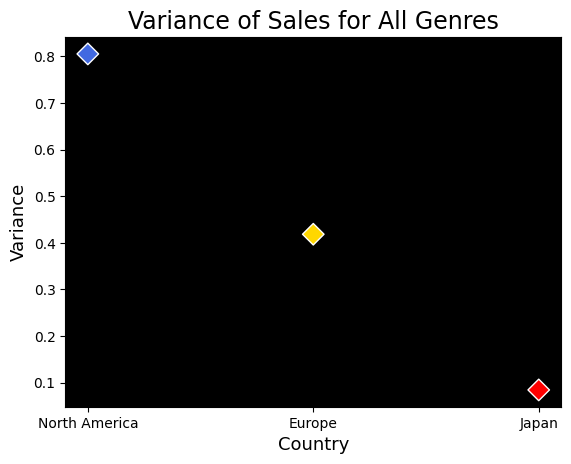

In [81]:
'''
This kernal exhibits the results of the
previous kernal in a scatter plot to display the 
variance of sales for each country by genre.
'''

markerSize= 120
axes = plt.axes()
plt.scatter(x=['North America', 'Europe', 'Japan'], y=gcsVariance,color=('royalblue', 'gold', 'red'), edgecolor='white', marker='D', s=markerSize)
plt.title("Variance of Sales for All Genres", size=17)
plt.xlabel('Country', size=13)
plt.ylabel('Variance', size=13)
axes.set_facecolor('black')

In [82]:
genreSales.mean()

North America    198.275000
Europe           116.379167
Japan             34.970000
dtype: float64

[Text(0.5, 1.0, 'Average of Sales for All Genres'),
 Text(0.5, 0, 'Country'),
 Text(0, 0.5, 'Total Sales')]

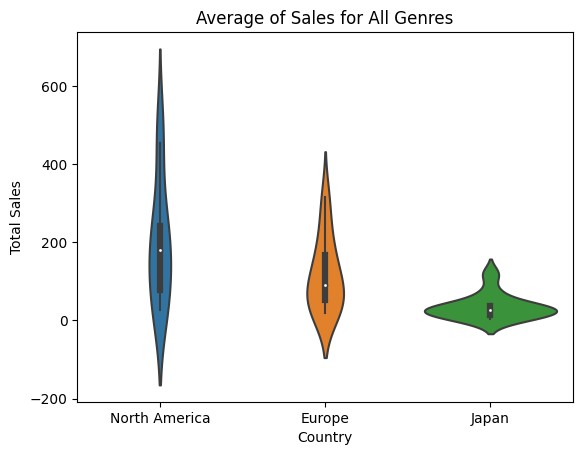

In [83]:
gcsMean = genreSales.mean()
sns.violinplot(data=genreSales).set(title='Average of Sales for All Genres', xlabel='Country', ylabel='Total Sales')

[Text(0.5, 1.0, 'Total Sales for Genres Combined'),
 Text(0.5, 0, 'Total Sales'),
 Text(0, 0.5, 'Container Count')]

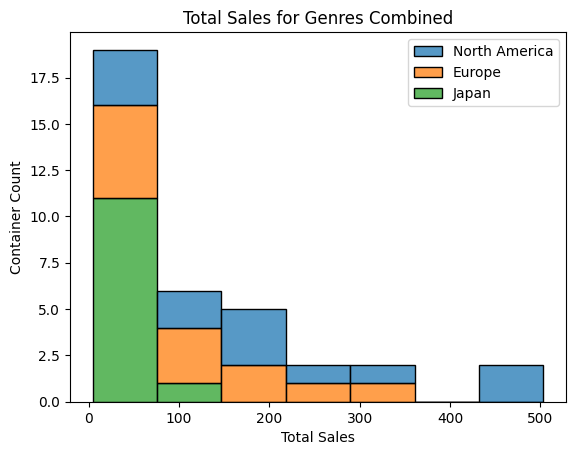

In [84]:
sns.histplot(genreSales, multiple='stack').set(title='Total Sales for Genres Combined', xlabel='Total Sales', ylabel='Container Count')

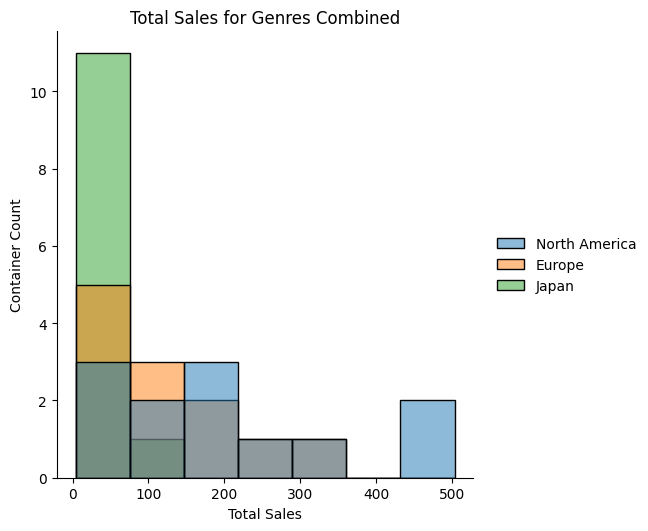

In [85]:
sns.displot(genreSales).set(title='Total Sales for Genres Combined', xlabel='Total Sales', ylabel='Container Count')